In [1]:
from Header import *
%matplotlib inline

# Data exploration

In [2]:
df = pd.read_excel("../sentences_with_sentiment.xlsx")

In [3]:
df = df.drop_duplicates(subset=['Sentence','Positive', 'Negative', 'Neutral'])

In [4]:
df.head()

,ID,Sentence,Positive,Negative,Neutral
0,1,The results in 2nd line treatment show an ORR ...,1,0,0
1,2,The long duration of response and high durable...,1,0,0
2,3,The median OS time in the updated results exce...,0,0,1
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0
4,5,"The data provided in 1st line, although prelim...",1,0,0


In [5]:
df.describe()

,ID,Positive,Negative,Neutral
count,236.000000,236.000000,236.000000,236.000000
mean,131.838983,0.593220,0.135593,0.271186
std,81.046556,0.492277,0.343084,0.445517
min,1.000000,0.000000,0.000000,0.000000
25%,60.750000,0.000000,0.000000,0.000000
50%,119.500000,1.000000,0.000000,0.000000
75%,207.250000,1.000000,0.000000,1.000000
max,266.000000,1.000000,1.000000,1.000000


In [7]:
print("Total number of rows:", len(df.index))

Total number of rows: 236


In [8]:
df[['Positive', 'Negative', 'Neutral']].sum(axis=0)

Positive    140
Negative     32
Neutral      64
dtype: int64

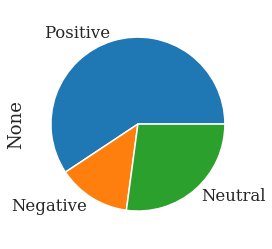

In [28]:
df[['Positive', 'Negative', 'Neutral']].sum(axis=0).plot.pie()

Unbalanced data, especially small number of negative values.<br>
In general small amount of data, I guess not enough for Deep Neural Networks.
Classifier with small number of features might work.

In [9]:
df[['Positive', 'Negative', 'Neutral']].sum(axis=1).max()

1

No sentence has more than one category.

In [10]:
print("Positive sentences:")
for i,s in enumerate(df[df.Positive==1].Sentence):
    print(str(i)+'.', s)

Positive sentences:
0. The results in 2nd line treatment show an ORR of 33% with some patients having durable responses resulting in an apparent PFS plateau
1. The long duration of response and high durable response rate observed after 6-month minimum follow-up is further substantiated by the 12-months minimum follow-up analysis
2. Therefore, the clinical benefit in 2nd line treatment is considered clinically meaningful and the magnitude of the effect is significant compared to chemotherapy
3. The data provided in 1st line, although preliminary, showed activity of avelumab in mMCC in terms of response rate, and evidence of a similar durable response from the small subset of patients with a longer follow-up compared to 2nd line treatment
4. Taking into account the intrinsic limitation of single arm studies, the rarity of the disease and the challenges to compare the results with data from historical controls and in the literature, the currently available data are deemed to support the e

In [11]:
print("Negative sentences:")
for i,s in enumerate(df[df.Negative==1].Sentence):
    print(str(i)+'.', s)

Negative sentences:
0. This means that further evidence on this medicinal product is awaited
1. The CHMP considers the following measures necessary to address the missing efficacy data for 1st line treatment in the context of a conditional MA:
2. • PASS: German real-world cohort study should be submitted as additional PhV activity to address the missing information of safety and efficacy in immune compromised patients
3. The CHMP considers the following measures necessary to address issues related to safety: 
4. Although dataset of AFL patients has been updated, data are still considered very limited to reach firm conclusion about safety proflie.
5. Additional safety data from maintenance study period CT-P10 3.3 and follow-up period should be provided (see RMP).
6. As questions still remain on the long term safety, ongoing open-label extension studies are being undertaken that will provide further data.
7. Only 3 pivotal randomized double-blind multicentre placebo controlled studies (P

# Key questions

<p>
Key Task:<br>
feasability of an automated sentiment analysis tool for EPARs, which
Identifies optimal and suboptimal clinical trial properties.
    So: <h3> Can I build a automated sentiment analysis tool? </h3>
</p>
<p>
Mentioned questions:
    <ul>
    <li> Is the dataset balanced? No </li>
    <li> Is the amount of data sufficient for allowing a hold-out dataset?
        Probalby no, only 29 points in train (in average). But k-fold cross-validation should be used. </li>
        <li>
            Do you have enough data to consider deep neural architectures or might good feature engineering with more shallow models suffice?
            Probably not, check numbers.
            </li>
        <li> During the data collection process, for some sentences multiple experts disagreed on the sentiment of a given sentence, how could you capture such an ambiguity in your model and potentially notify users about such unclear instances?
        Give chances, not only categories.
            Maybe, train more than one model. And compare results in the end.
        </li>
        <li>
        How does your model come to a specific conclusion, what about model interpretability?
        </li>
        <li>
        Think beyond the pure sentiment analysis.
            We can extract sentences and their meaning using dictionaries.
            One method is "Vader" in nltk.[3]
        </li>
</p>
<p>
Additional Questions: <br>
    Remove stop words? Only the ones without sentiment, like "and", "to", "a" 
two or three categories? <br>
Machine learning or knowledge-based? Very specific, so knowledge based might not work.<br>
</p>
<p>
    Notes:<br>
    Humans are only 80% correct.[2] (Mechanical turk)<br>
    Sentiment is only a hint, points in the right direction. But needs humans.<br>
    Use different models for different questions.
    </p>
<p>
    Sources: <br>
    [1] https://en.wikipedia.org/wiki/Sentiment_analysis <br>
    [2] https://mashable.com/2010/04/19/sentiment-analysis/?europe=true <br>
    [3] file:///Users/musshoff/Downloads/A_Benchmark_Comparison_of_State-of-the-Practice_Se.pdf
    </p>

# Add labels

In [12]:
labeldict = {1 : 'Positive', 2: 'Negative', 4: 'Neutral'}
df['Label'] = list(map(lambda x: labeldict[x],df.Positive + df.Negative*2 + df.Neutral*4))
labeldict = {1 : 'Positive', 2: 'NotPositive'}
df['PositiveLabel'] = list(map(lambda x: labeldict[x],df.Positive + (df.Negative + df.Neutral)*2))
labeldict = {1 : 'Negative', 2: 'NotNegative'}
df['NegativeLabel'] = list(map(lambda x: labeldict[x],df.Negative + (df.Positive + df.Neutral)*2))

In [13]:
df.head()

,ID,Sentence,Positive,Negative,Neutral,Label,PositiveLabel,NegativeLabel
0,1,The results in 2nd line treatment show an ORR ...,1,0,0,Positive,Positive,NotNegative
1,2,The long duration of response and high durable...,1,0,0,Positive,Positive,NotNegative
2,3,The median OS time in the updated results exce...,0,0,1,Neutral,NotPositive,NotNegative
3,4,"Therefore, the clinical benefit in 2nd line tr...",1,0,0,Positive,Positive,NotNegative
4,5,"The data provided in 1st line, although prelim...",1,0,0,Positive,Positive,NotNegative


In [19]:
df.index = np.arange(len(df.index))

In [20]:
df = df.reindex(np.random.permutation(df.index))
df.index = np.arange(len(df.index))

In [21]:
df.to_pickle("training_df.pkl")